# Network 

## Make the network

In [115]:
import networkx as nx
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd


# Load the character attributes data
character_data = pd.read_csv('character_attributes.csv')

# Load the connections data
connections_data = pd.read_csv('character_connections.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph with character attributes
for index, row in character_data.iterrows():
    G.add_node(row['character'], dialogue_count=row['dialogue_count'],
                                scene_count=row['scene_count'], 
                                arc_presence=row['arc_presence'],
                                positive_proportion=row['positive_proportion'],
                                negative_proportion=row['negative_proportion'],
                                neutral_proportion=row['neutral_proportion'],)

# Add edges to the graph with the count as weight
for index, row in connections_data.iterrows():
    pair = eval(row['pair'])  # Convert the string tuple to an actual tuple
    count = row['count']
    G.add_edge(pair[0], pair[1], weight=count)


# Extract the largest connected component
largest_component = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_component).copy()

# Save the graph as a .pkl file
with open('largest_component_graph.pkl', 'wb') as file:
    pkl.dump(G, file)

# To load the graph use the following code
# with open("largest_component_graph.pkl", "rb") as f: 
# G = pkl.load(f)

# Basic Statistics 

Number of Nodes: 313, Number of Edges: 965
Density of the Network: 0.01976325059392152


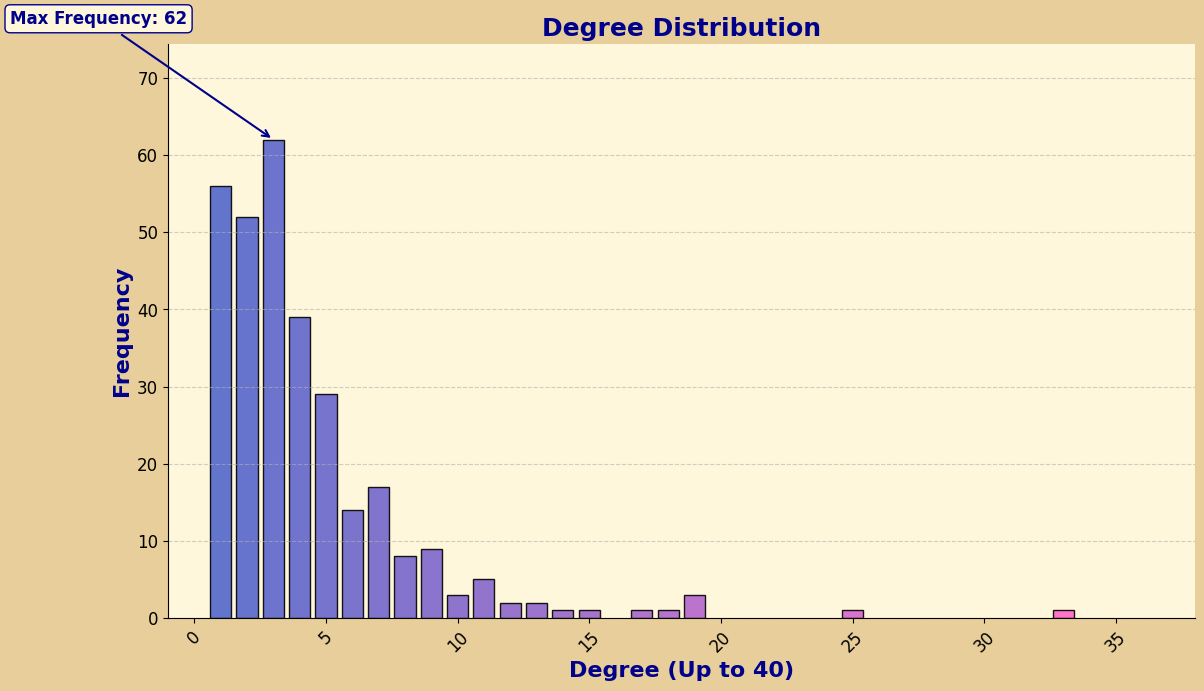

In [124]:
import matplotlib.pyplot as plt
import networkx as nx

# Basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of Nodes: {num_nodes}, Number of Edges: {num_edges}")

density = nx.density(G)
print(f"Density of the Network: {density}")

# Degree distribution
degree_counts = [G.degree(n) for n in G.nodes()]
unique_degrees = sorted(set(degree_counts))
degree_frequencies = [degree_counts.count(d) for d in unique_degrees]

# Filter degrees up to 40
filtered_degrees = [d for d in unique_degrees if d <= 40]
filtered_frequencies = [degree_frequencies[unique_degrees.index(d)] for d in filtered_degrees]

# Visualization with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 7))

# Colors
beige = (254 / 255, 247 / 255, 219 / 255)
desert_sand = (231 / 255, 206 / 255, 154 / 255)

# Set figure and subplot background colors
fig.patch.set_facecolor(desert_sand)
ax.set_facecolor(beige)

# Plot bars with gradient color
bar_colors = [(0.3 + (d / max(filtered_degrees)) * 0.7, 0.4, 0.8) for d in filtered_degrees]
ax.bar(filtered_degrees, filtered_frequencies, alpha=0.9, color=bar_colors, edgecolor='black', width=0.8)

# Add labels, title, and customize fonts
ax.set_title("Degree Distribution", fontsize=18, fontweight='bold', color='darkblue')
ax.set_xlabel("Degree (Up to 40)", fontsize=16, fontweight='bold', color='darkblue')
ax.set_ylabel("Frequency", fontsize=16, fontweight='bold', color='darkblue')

# Customize ticks and their size
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Set x-axis limits for better spacing and y-axis scale
ax.set_xlim(-1, max(filtered_degrees) + 5)
ax.set_ylim(0, max(filtered_frequencies) * 1.2)

# Add gridlines
ax.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.6)

# Highlight the largest frequency with text annotation
max_frequency_filtered = max(filtered_frequencies)
max_degree_filtered = filtered_degrees[filtered_frequencies.index(max_frequency_filtered)]
ax.annotate(
    f"Max Frequency: {max_frequency_filtered}",
    xy=(max_degree_filtered, max_frequency_filtered),
    xytext=(max_degree_filtered - 10, max_frequency_filtered + 15),
    fontsize=12,
    fontweight='bold',
    color='darkblue',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='darkblue', facecolor=beige),
    arrowprops=dict(facecolor='darkblue', edgecolor='darkblue', arrowstyle="->", lw=1.5),
)

# Remove top and right borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Degree Distribution
The degree distribution (shown in the plot) highlights that most characters have a low degree (few connections), while a small number of central characters have significantly higher degrees. This is characteristic of a **scale-free network**, where a few nodes act as hubs.

# Network Analysis of Avatar Character Network

## Basic Network Properties
- **Number of Nodes**: 315  
- **Number of Edges**: 970  
- **Density of the Network**: 0.0196  

The network is sparse, with a low density of approximately 0.02. This indicates that only about 2% of all possible connections between characters exist.
### 1. **In Terms of the Show**
- **Focused Interactions**:
  - The low density reflects that interactions in *Avatar: The Last Airbender* are carefully curated. Not all characters interact with each other directly, which mirrors the storytelling approach where interactions are meaningful and often tied to specific arcs.
  - For example, members of the Fire Nation may primarily interact with one another and only occasionally with Team Avatar.

- **Diverse Subgroups**:
  - Sparsity allows for the formation of distinct character clusters or subgroups, like Team Avatar, the Fire Nation royal family, or supporting side characters. These clusters align with the show’s narrative structure, which frequently shifts focus between different character groups.

- **Character-Driven Narrative**:
  - In a sparse network, hubs (central characters like Aang or Sokka) become even more crucial for maintaining connectivity. This reflects the show’s reliance on core characters to drive the plot while others appear more sporadically based on the needs of the story.

### 2. **In Terms of Graph Theory**
- **Real-World Networks**:
  - Sparse networks are typical in real-world systems, such as social networks or transportation systems, where not every individual or node connects to every other node. The network of characters in *Avatar* follows a similar pattern, emphasizing realistic interaction dynamics.

- **Scale-Free Properties**:
  - Sparsity often hints at a **scale-free network**, where a few nodes (characters) have very high connectivity, while most nodes have only a few connections. This matches the central role of characters like Aang, Sokka, and Katara in the show.

- **Efficiency**:
  - Sparse networks are computationally efficient to analyze and often exhibit hierarchical clustering. This allows for insights into both the local dynamics (e.g., relationships within Team Avatar) and the global structure of the network.

### 3. **Narrative Implications**
The sparsity of the network highlights:
- **Intentional Relationships**: Character interactions are deliberate and tied to the story's progression rather than being random or excessive.
- **Narrative Flow**: Characters are introduced and interact based on relevance to specific episodes or arcs, avoiding unnecessary complexity.
- **Hubs and Bridges**: Core characters act as hubs, while others serve as bridges between different groups. This structure supports a cohesive yet expansive narrative, where key players maintain the story's connectivity.

In conclusion, the network's sparsity reflects both the show's thoughtful narrative design and the principles of real-world social networks. It highlights how *Avatar: The Last Airbender* balances complexity and focus to create an engaging, character-driven story.

## Centrality Measures:

In [123]:
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Degree Centrality:", top_degree)

betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Betweenness Centrality:", top_betweenness)

closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Closeness Centrality:", top_closeness)



Top 10 Characters by Degree Centrality: [('aang', 0.5192307692307692), ('sokka', 0.46794871794871795), ('katara', 0.4006410256410256), ('zuko', 0.24679487179487178), ('toph', 0.20512820512820512), ('iroh', 0.15064102564102563), ('azula', 0.10576923076923077), ('suki', 0.08012820512820512), ('zhao', 0.060897435897435896), ('jet', 0.060897435897435896)]
Top 10 Characters by Betweenness Centrality: [('aang', 0.3531350231395516), ('sokka', 0.2659662350861756), ('zuko', 0.19879692354958797), ('katara', 0.18853024700833662), ('toph', 0.08935389571567368), ('shinu', 0.07377169582144058), ('iroh', 0.06728870536696921), ('azula', 0.053018454036663776), ('warden', 0.05153471195726275), ('mai', 0.04950412438466995)]
Top 10 Characters by Closeness Centrality: [('aang', 0.6638297872340425), ('sokka', 0.6303030303030303), ('katara', 0.6034816247582205), ('zuko', 0.5473684210526316), ('toph', 0.5370051635111877), ('iroh', 0.5123152709359606), ('azula', 0.5016077170418006), ('suki', 0.4968152866242038

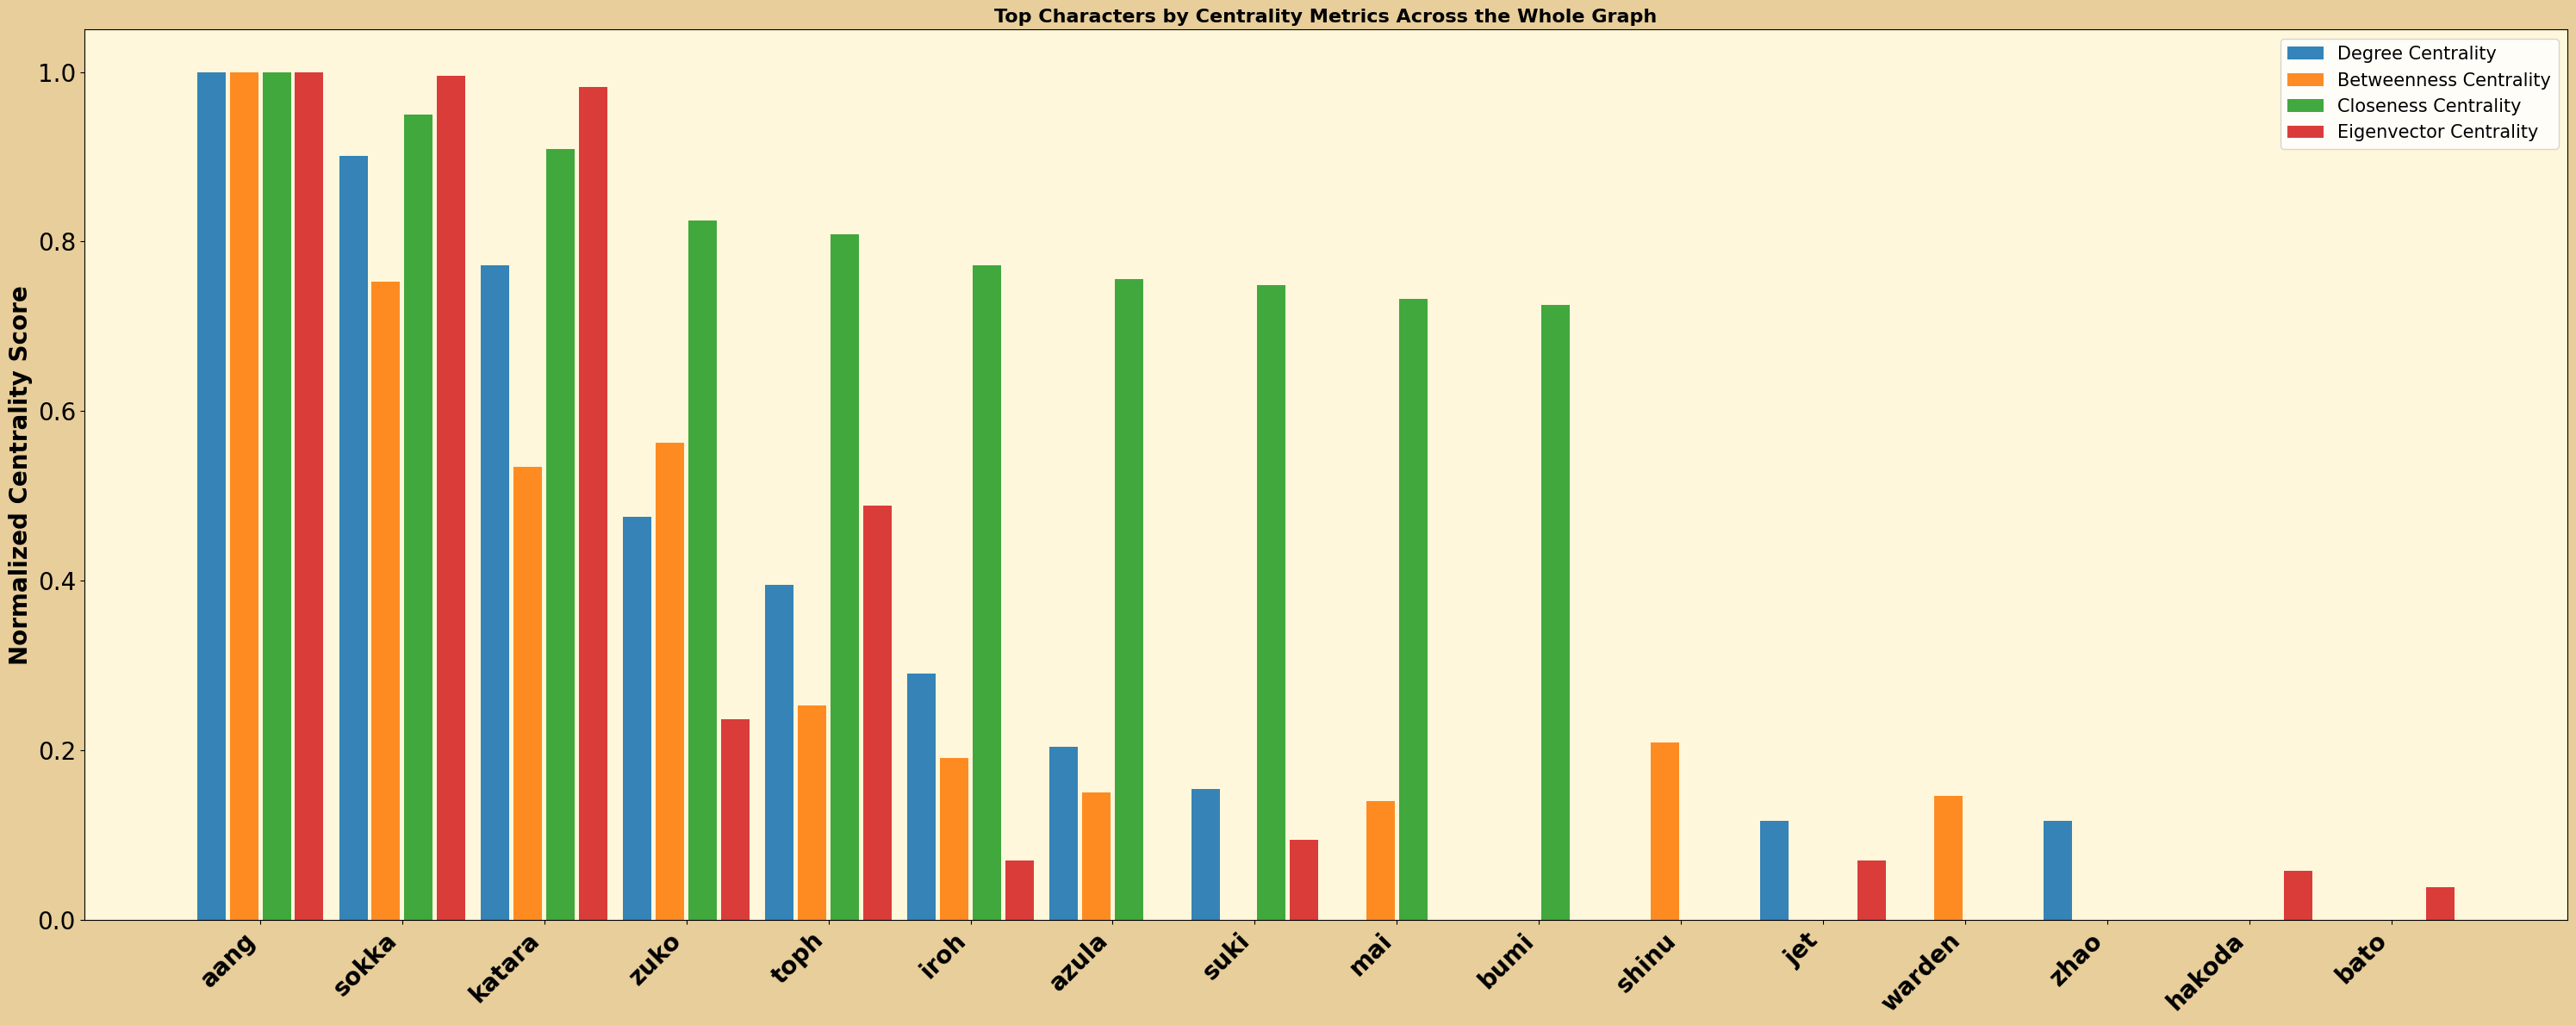

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# centrality measures 
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Combine data for visualization
metrics = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']
centrality_data = {
    'Degree Centrality': top_degree,
    'Betweenness Centrality': top_betweenness,
    'Closeness Centrality': top_closeness,
    'Eigenvector Centrality': top_eigenvector
}

# Collect all unique characters across metrics
all_chars = set()
for metric in metrics:
    all_chars.update([x[0] for x in centrality_data[metric]])

# Prepare data for plotting
all_chars = list(all_chars)
plot_data = []
max_scores = {metric: max([x[1] for x in centrality_data[metric]]) for metric in metrics if centrality_data[metric]}

# Compute normalized scores
char_scores = {char: 0 for char in all_chars}  # Sum of normalized scores for ordering
for metric in metrics:
    metric_scores = []
    for char in all_chars:
        score = dict(centrality_data[metric]).get(char, 0)
        normalized_score = score / max_scores[metric] if metric in max_scores and max_scores[metric] > 0 else 0
        metric_scores.append(normalized_score)
        char_scores[char] += normalized_score
    plot_data.append(metric_scores)

# Order characters by their total normalized score
sorted_chars = sorted(char_scores.keys(), key=lambda c: char_scores[c], reverse=True)
sorted_plot_data = [[scores[all_chars.index(char)] for char in sorted_chars] for scores in plot_data]


# Visualization
fig, ax = plt.subplots(figsize=(30, 12))
ax.tick_params(axis='y', labelsize=20)  


# Increase the width of the bars
bar_width = 0.2
x = np.arange(len(sorted_chars))

# Colors
beige = (254 / 255, 247 / 255, 219 / 255)
desert_sand = (231 / 255, 206 / 255, 154 / 255)

# Set figure and subplot background colors
fig.patch.set_facecolor(desert_sand)
ax.set_facecolor(beige)

# Plot bars
for i, metric in enumerate(metrics):
    offset = (i - (len(metrics) - 1) / 2) * (bar_width + 0.03)
    ax.bar(x + offset, sorted_plot_data[i], width=bar_width, label=metric, alpha=0.9)

# Add labels, title, legend
ax.set_xticks(x)
ax.set_xticklabels(sorted_chars, rotation=45, ha='right', fontsize=20, fontweight='bold')
ax.set_ylabel('Normalized Centrality Score', fontsize=20, fontweight='bold')
ax.set_title('Top Characters by Centrality Metrics Across the Whole Graph', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=15)


plt.tight_layout()
plt.show()


The provided graph and centrality rankings offer insights into the social structure and influence of the characters in "Avatar: The Last Airbender." Here's an interpretation of the outputs for each centrality metric:

### 1. **Degree Centrality**
   - **Definition**: Measures the number of direct connections a character has in the network.
   - **Key Characters**:
     - **Aang** (0.52): As the protagonist, Aang interacts with the most characters, emphasizing his central role in the series.
     - **Sokka** (0.47) and **Katara** (0.40): Their high degree centrality reflects their frequent involvement in various storylines and connections to multiple groups.
     - **Zuko** (0.25): As a main antagonist-turned-protagonist, his moderate degree reflects significant but more focused interactions compared to Aang and Team Avatar.
   - **Other Observations**:
     - **Toph** and **Iroh** have moderate scores, reflecting their vital but less widespread connections.
     - **Zhao** and **Jet** have low degree centrality, showing their limited roles and fewer direct connections in the story.

### 2. **Betweenness Centrality**
   - **Definition**: Measures how often a character acts as a bridge along the shortest path between others.
   - **Key Characters**:
     - **Aang** (0.35): His journey and connections across all nations make him a central "bridge" character.
     - **Sokka** (0.27): His tactical role in planning and connecting various groups is highlighted here.
     - **Zuko** (0.20): His story arc often involves navigating between different factions, enhancing his role as a bridge.
     - **Shinu** (0.07) and **Warden** (0.05): Their relatively high scores suggest key plot-related roles where they connect otherwise separate groups.
   - **Other Observations**:
     - **Mai** (0.05) and **Azula** (0.05): Their roles in connecting Fire Nation politics to the main plot explain their presence in this metric.

### 3. **Closeness Centrality**
   - **Definition**: Measures how quickly a character can interact with others, reflecting overall accessibility within the network.
   - **Key Characters**:
     - **Aang** (0.66): As the central figure of the series, Aang has the highest accessibility across the network.
     - **Sokka** (0.63) and **Katara** (0.60): As part of Team Avatar, their proximity to key characters and plotlines ensures they remain central.
     - **Zuko** (0.55): His consistent involvement across various plotlines reflects this relatively high score.
   - **Other Observations**:
     - **Suki** and **Mai** have moderate scores, reflecting their importance in specific arcs.
     - **Azula** (0.50): Despite her limited physical proximity, her calculated involvement in crucial moments explains her high closeness centrality.

### Synthesis of Metrics:
   - **Aang, Sokka, and Katara** consistently dominate across all centrality metrics, reaffirming their central roles in the story.
   - **Zuko** stands out for his significant bridging role, indicating his narrative importance as a connector between factions.
   - **Toph and Iroh** hold moderately high scores, emphasizing their roles as supporting but impactful characters.
   - Characters like **Azula**, **Mai**, and **Suki** have mixed results, reflecting their influence in specific contexts but not as broadly as the main cast.



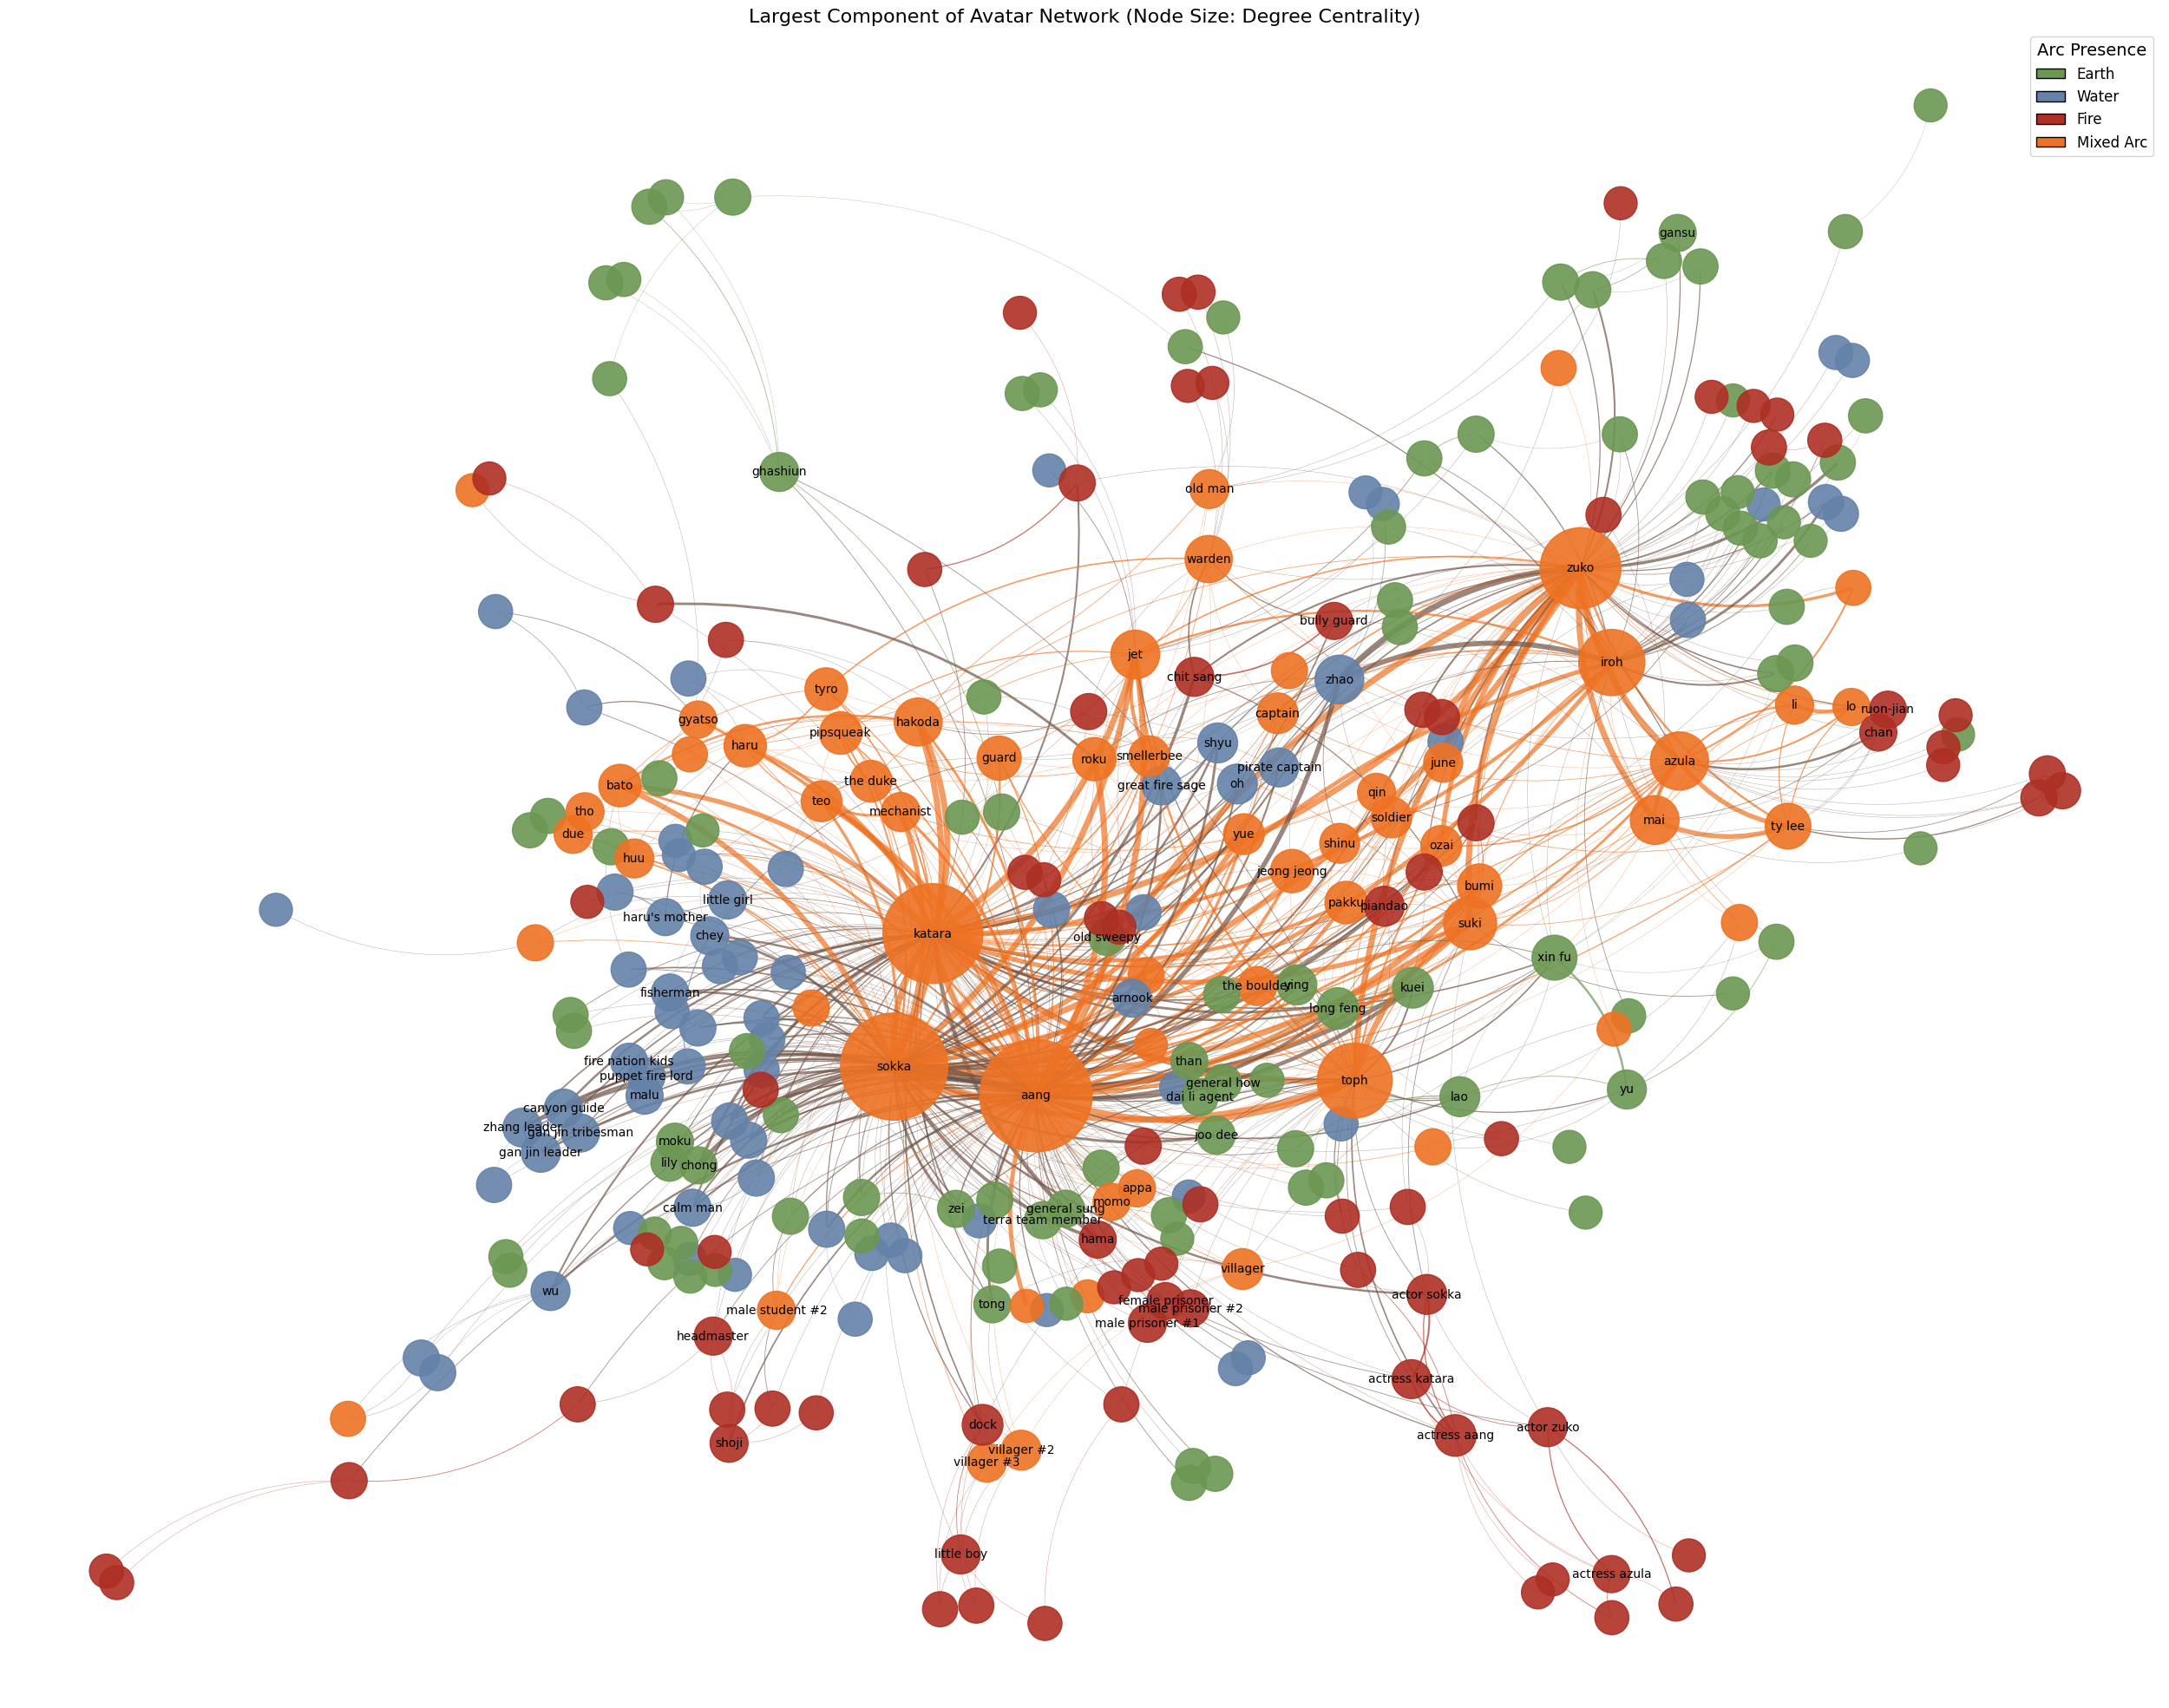

In [126]:
from matplotlib.patches import Patch, FancyArrowPatch
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Initialize ForceAtlas2 for layout generation
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,
    adjustSizes=False,
    edgeWeightInfluence=1,
    jitterTolerance=1,
    barnesHutOptimize=True,
    barnesHutTheta=0,
    multiThreaded=False,
    scalingRatio=0.000001,
    strongGravityMode=False,
    gravity=0.0001,
    verbose=False
)

# Compute positions using ForceAtlas2
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

positions = {
    node: (x * 5, y * 5)  # Multiplying by 5 will spread them out more
    for node, (x, y) in positions.items()
}

# Define a function to determine node colors based on arc presence
def get_node_color(arc_presence):
    earth_color = "#6C9753"  # Green
    water_color = "#6482A8"  # Blue
    fire_color = "#AE2F24"   # Red
    mixed_color = "#EE7223"  # Orange
    default_color = "#715447"

    colors = []
    if "earth" in arc_presence.lower():
        colors.append(earth_color)
    if "water" in arc_presence.lower():
        colors.append(water_color)
    if "fire" in arc_presence.lower():
        colors.append(fire_color)
    if len(colors) == 1:
        return colors[0]
    elif len(colors) > 1:
        return mixed_color  # Use mixed color for multiple arcs
    return default_color  # Default color for no arcs

# Calculate degree centrality for node sizes
degree_centrality = nx.degree_centrality(G)
max_degree_centrality = max(degree_centrality.values()) if degree_centrality else 1

# Get node sizes and colors based on degree centrality
node_sizes = []
node_colors = []

for node, attributes in G.nodes(data=True):
    arc_presence = attributes.get("arc_presence", "")

    # Scale node size based on degree centrality
    centrality = degree_centrality.get(node, 0)
    scaled_size = 700 + (centrality / max_degree_centrality) * 8000  # Adjust scaling factor as needed
    node_sizes.append(scaled_size)

    # Node color
    node_colors.append(get_node_color(arc_presence))

# Define a function to determine edge colors based on connected nodes
def get_edge_color(u, v):
    u_color = get_node_color(G.nodes[u].get("arc_presence", ""))
    v_color = get_node_color(G.nodes[v].get("arc_presence", ""))
    return u_color if u_color == v_color else "#715447"

# Define a scaling factor and cap for edge widths
scaling_factor = 0.3
max_width = 5
edge_widths = [
    min(G[u][v].get('weight', 1) * scaling_factor, max_width) 
    for u, v in G.edges()
]

# Get edge colors
edge_colors = [get_edge_color(u, v) for u, v in G.edges()]

# Create legend elements
legend_elements = [
    Patch(facecolor="#6C9753", edgecolor="black", label="Earth"),
    Patch(facecolor="#6482A8", edgecolor="black", label="Water"),
    Patch(facecolor="#AE2F24", edgecolor="black", label="Fire"),
    Patch(facecolor="#EE7223", edgecolor="black", label="Mixed Arc")
]

# Visualization
fig, ax = plt.subplots(figsize=(32, 25))
plt.axis("off")

# Draw nodes
nx.draw_networkx_nodes(
    G, positions, 
    node_size=node_sizes, 
    node_color=node_colors, 
    alpha=0.9,
    ax=ax
)

# Identify key nodes for labeling
threshold = np.percentile(list(degree_centrality.values()), 60)  # Adjust percentage as needed
key_nodes = [node for node, centrality in degree_centrality.items() if centrality > threshold]

nx.draw_networkx_labels(
    G, positions, 
    labels={node: node for node in key_nodes}, 
    font_size=10, 
    font_color="black",
    ax=ax
)

# Draw curved edges using FancyArrowPatch
for ((u, v), w, c) in zip(G.edges(), edge_widths, edge_colors):
    x1, y1 = positions[u]
    x2, y2 = positions[v]

    # Determine alpha based on width
    alpha_val = min(0.5 + w / max_width, 0.7)

    # Create a curved edge
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        connectionstyle="arc3,rad=0.2",  # Adjust rad for more/less curve
        color=c,
        alpha=alpha_val,
        linewidth=w,
        arrowstyle='-'
    )
    ax.add_patch(arrow)

# Add legend
plt.legend(handles=legend_elements, loc="upper right", fontsize=12, title="Arc Presence", title_fontsize=14)

plt.title("Largest Component of Avatar Network (Node Size: Degree Centrality)", fontsize=16)
plt.show()


### 1. Node Sizes and Centrality
The **size of the nodes** seems to represent how central each character is to the story, likely based on the number of direct connections they have with others. Unsurprisingly, **Aang**, **Sokka**, and **Katara** have the largest nodes, solidifying their roles as the most connected and integral characters in the network. It makes sense since the story revolves around them—they’re at the heart of nearly every arc, interacting with allies, enemies, and neutral parties alike.

It’s also interesting to note how some secondary characters like **Zuko** and **Toph** have moderately large nodes, which reflects their importance without overshadowing the core trio. Zuko’s size in particular highlights how his narrative overlaps with so many different groups, from Team Avatar to Fire Nation loyalists.

### 2. Color Coding by Arc Presence
The nodes are color-coded to indicate the arcs where characters predominantly appear:
   - **Orange** represents characters that appear across multiple arcs, like the main characters of Team Avatar.
   - **Blue** is for water-related arcs.
   - **Green** for earth-related arcs.
   - **Red** for fire-related arcs.

What’s striking is how many **orange nodes** dominate the center of the graph. This indicates that characters like Aang, Katara, and Sokka are not only central figures in the narrative but also serve as connective tissue between the arcs. On the other hand, **red nodes** (Fire Nation characters) tend to cluster slightly on the periphery, showing that, while vital to specific plots, they’re not as interwoven with every aspect of the story. Meanwhile, **green nodes** (earth arcs) are more spread out, reflecting the diversity of characters and settings in those storylines, like Ba Sing Se or the Earth Kingdom villages.

### 3. Cluster Formation
Looking at the graph, we can see clear clusters forming, which provide an excellent visual of the story’s social dynamics:
   - **Team Avatar Cluster**: At the core of the graph is a dense web centered around Aang, Katara, and Sokka. This cluster also connects to their close allies like Toph, Iroh, and occasionally Zuko, showing how these characters are all deeply tied to the central story.
   - **Fire Nation Cluster**: There’s a distinct group of red nodes surrounding Azula, Mai, and Ty Lee, reflecting their shared storylines and connections as antagonists. Zuko is part of this cluster but also acts as a bridge to the central Team Avatar group, which makes sense given his eventual shift in allegiance.
   - **Smaller Peripheral Clusters**: Jet’s Freedom Fighters, the Dai Li agents, and other minor characters form their own, more isolated groups. These clusters highlight how these characters are tied to specific plotlines but don’t have as much influence on the broader narrative.

A particularly fun cluster to note is the **Ember Island Players**, who are grouped together as their own isolated network. This reflects how their role is confined to one memorable episode, making them distinct but not central to the larger story.

### 4. Bridges Between Clusters
Certain characters serve as bridges between different parts of the network, playing pivotal roles in linking otherwise separate groups. For example:
   - **Zuko**: His position between the Fire Nation and Team Avatar clusters mirrors his character arc. He starts as an antagonist but gradually becomes an ally, connecting two very different sides of the narrative.
   - **Iroh**: Known for his wisdom and diplomacy, Iroh naturally acts as a connector, linking Zuko and the Fire Nation to other parts of the story. His connections with Team Avatar later in the series further emphasize this role.

Bridges like these highlight the depth of the story's character interactions, where loyalties and relationships evolve over time.


### 5. Density and Overlap
The central region of the graph is densely packed, representing characters who are deeply interconnected, such as Aang, Katara, Sokka, and their closest allies. This reflects how the main cast is heavily involved in almost all major events and arcs. 

On the other hand, the **peripheral regions** are far less dense, showcasing characters who play episodic or arc-specific roles. For example, Jet and his group or the Ember Island Players are more isolated because their influence doesn’t extend far beyond their particular storylines.

One observation worth noting is how the **blue nodes** (water arc characters) are clustered closer to the center. This suggests that characters from the Water Tribes, especially those in the Northern and Southern Water Tribes, tend to interact more frequently with the central cast. In contrast, **green nodes** (earth arcs) are more spread out, reflecting the Earth Kingdom’s vastness and the diversity of characters and locations within that arc. The **red nodes** (fire arcs) feel somewhat peripheral, as Fire Nation characters often operate within their own faction until they directly clash with the main group.

